In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('StudentsPerformance.csv')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


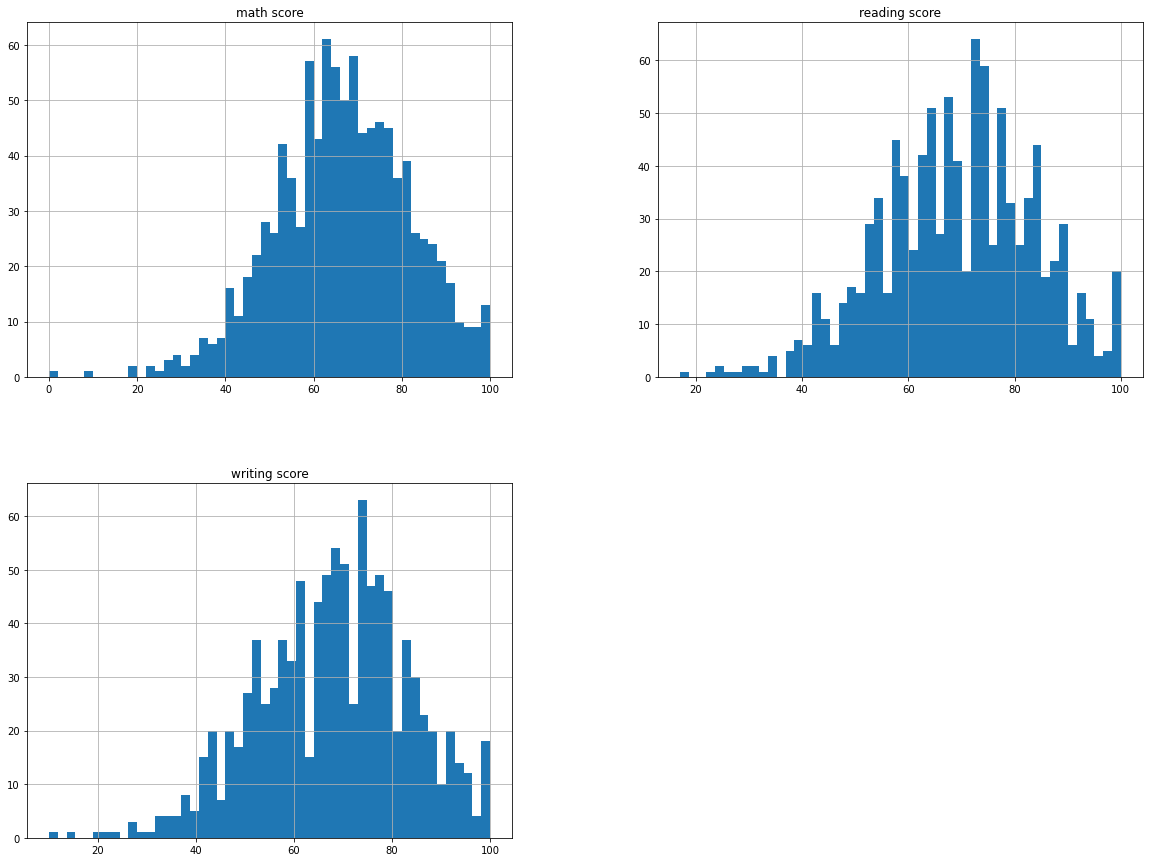

In [5]:
%matplotlib inline
data.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
data['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [7]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

<AxesSubplot:>

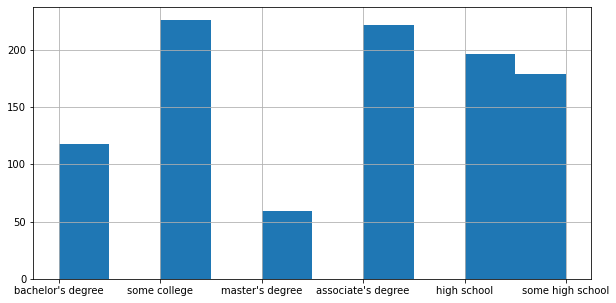

In [8]:
data['parental level of education'].hist(figsize = (10,5))

In [9]:
data['mean_score'] = (data['math score'] + data['reading score'] + data['writing score'])/3

<AxesSubplot:>

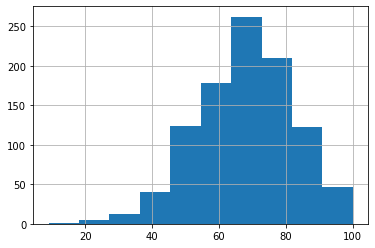

In [11]:
data['mean_score'].hist()

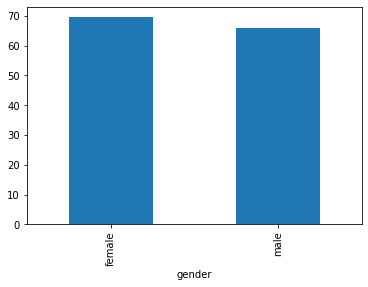

In [31]:
ax = data.groupby('gender')['mean_score'].mean().plot.bar()

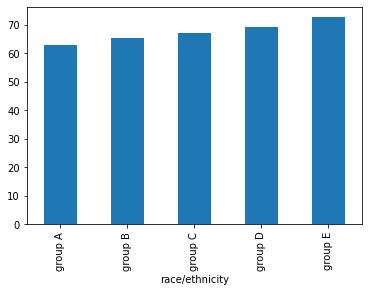

In [33]:
ax = data.groupby('race/ethnicity')['mean_score'].mean().plot.bar()

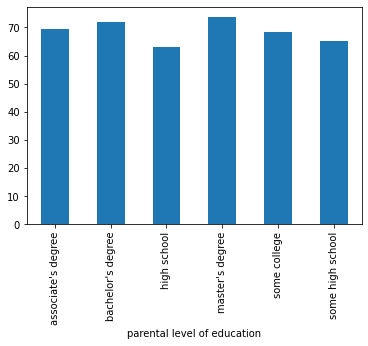

In [34]:
ax = data.groupby('parental level of education')['mean_score'].mean().plot.bar()

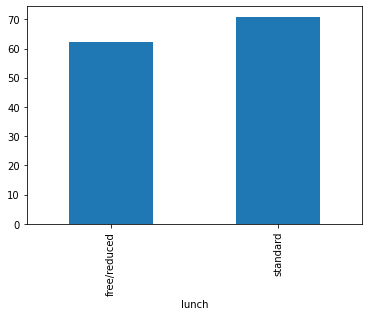

In [35]:
ax = data.groupby('lunch')['mean_score'].mean().plot.bar()

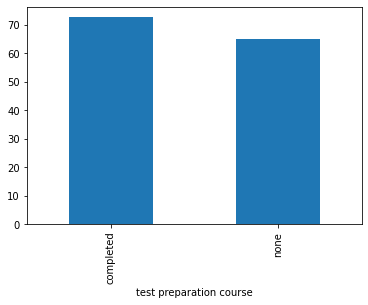

In [37]:
ax = data.groupby('test preparation course')['mean_score'].mean().plot.bar()

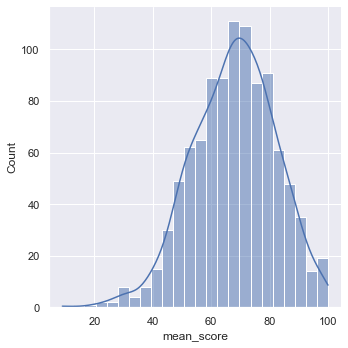

In [45]:
import seaborn as sns, numpy as np
sns.set_theme(); 

ax = sns.displot(data['mean_score'], kde=True)

In [47]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse = False)

In [49]:
ohe.fit_transform(data[['gender']])

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [50]:
ohe.fit_transform(data[['lunch']])
ohe.fit_transform(data[['test preparation course']])


array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [51]:
from sklearn.preprocessing import OrdinalEncoder

education_categories = ["some high school", 
                        "high school" , 
                        "some college", 
                        "associate's degree", 
                        "bachelor's degree", 
                        "master's degree"]

In [52]:
oe = OrdinalEncoder(categories = [education_categories])

In [56]:
data['oe_parent_ed'] = oe.fit_transform(data[['parental level of education']])

In [57]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_score,oe_parent_ed
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,4.0
1,female,group C,some college,standard,completed,69,90,88,82.333333,2.0
2,female,group B,master's degree,standard,none,90,95,93,92.666667,5.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,3.0
4,male,group C,some college,standard,none,76,78,75,76.333333,2.0


In [58]:
X = data.drop('mean_score', axis =1)
Y = data['mean_score']

In [61]:
from sklearn.compose import make_column_transformer

column_transform = make_column_transformer(
    (ohe, ['gender', 'race/ethnicity', 'lunch', 'test preparation course']),
    (oe, ['parental level of education']))

In [62]:
column_transform.fit_transform(X)

array([[1., 0., 0., ..., 0., 1., 4.],
       [1., 0., 0., ..., 1., 0., 2.],
       [1., 0., 0., ..., 0., 1., 5.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 2.],
       [1., 0., 0., ..., 0., 1., 2.]])

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

lm = LinearRegression()
lm_pipeline = make_pipeline(column_transform, lm)

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

gbm  = GradientBoostingRegressor()
gbm_pipeline = make_pipeline(column_transform, gbm)



In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size = .30,
                                                    random_state = 42)

In [68]:
lm_pipeline.fit(X_train, Y_train)
lm_predictions = lm_pipeline.predict(X_test)
print("First 5 LM predictions: ", list(lm_predictions[:5]))

gbm_pipeline.fit(X_train, Y_train)
gbm_predictions = gbm_pipeline.predict(X_test)
print("First 5 GBM predictions: ", list(gbm_predictions[:5]))

First 5 LM predictions:  [70.75915726738543, 66.21057241064892, 71.20605482276784, 56.832675804568915, 78.06510895753397]
First 5 GBM predictions:  [70.0324654075401, 72.82747187650256, 68.63467096651154, 58.88811703198366, 76.97875270900471]


In [72]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


lm_mae = mean_absolute_error(lm_predictions, Y_test)
lm_rmse = np.sqrt(mean_squared_error(lm_predictions, Y_test))
print("LM MAE: {:.2f}".format(round(lm_mae,2)))
print("LM RMSE: {:.2f}".format(round(lm_rmse,2)))

gbm_mae = mean_absolute_error(gbm_predictions, Y_test)
gbm_rmse = np.sqrt(mean_squared_error(gbm_predictions, Y_test))
print("GBM MAE: {:.2f}".format(round(gbm_mae,2)))
print("GBM RMSE: {:.2f}".format(round(gbm_rmse,2)))


LM MAE: 10.49
LM RMSE: 13.14
GBM MAE: 10.95
GBM RMSE: 13.78
